We will be working with auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 3/Automobile_insurance_fraud.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape

(1000, 40)

The dimension of our data is 1000 rows * 40 columns

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

1. We can see that our data is having datatypes of integer, float and object.
2. "Policy_bind-date" and "incident_date" both columns are having dates.
3. These date columns can be removed as they are not required for model building.

In [8]:
# Dropping date column, as its not required for model building.
df.drop(['policy_bind_date', 'incident_date'], axis=1, inplace= True)

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [12]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
***************************************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
***************************************************************************
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
***************************************************************************
OH 

1. Here we can see that the last column is not having any values, hence deleting that column as well.
2. "?" is in the columns, "collision_type","property_damage","police_report_available".

In [13]:
df.drop('_c39', axis=1, inplace= True)

In [14]:
#checking the number of null values present in each columns 

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

We can see that there are no null values present.

In [16]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [27]:
# Changing question mark in our data per Mode

df['collision_type'] = df['collision_type'].replace('?', 'Rear Collision')
df['property_damage'] = df['property_damage'].replace('?','NO' )
df['police_report_available'] = df['police_report_available'].replace('?', 'NO')

In [28]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
***************************************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
***************************************************************************
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
***************************************************************************
OH 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

<Axes: xlabel='fraud_reported', ylabel='count'>

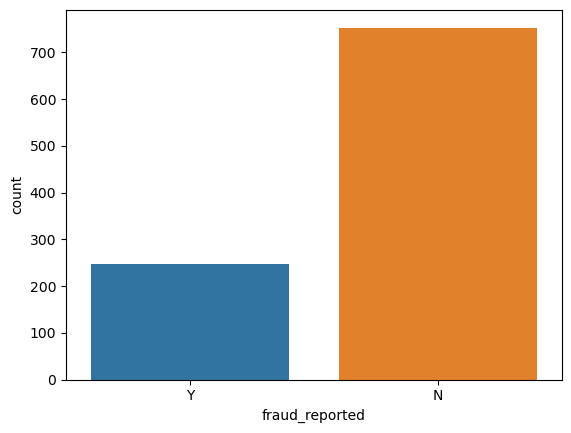

In [30]:
sns.countplot(x = 'fraud_reported', data = df)

In [31]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])
age_vs_fraud = pd.crosstab(df['age_bins'], df['fraud_reported'])
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


<Axes: xlabel='age_bins'>

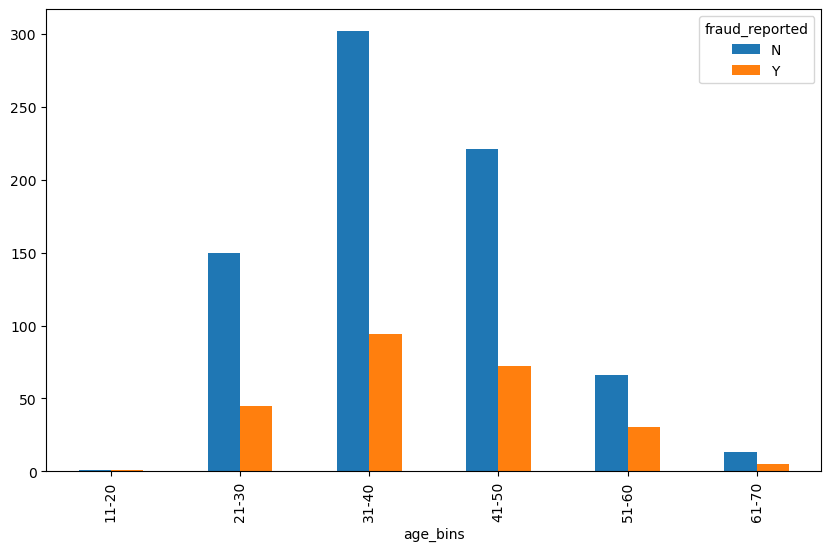

In [32]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

Most of the frauds are reported in age limit 31 to 50

<Axes: xlabel='incident_severity', ylabel='count'>

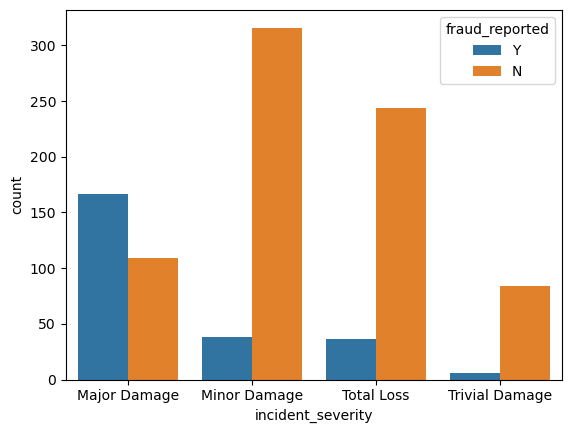

In [33]:
sns.countplot(x = 'incident_severity',hue = 'fraud_reported', data = df)

More number of fraud cases reported are with in Major damage cases when compared to minor and Trivial damage

In [35]:
df['months_as_customer'].max()

479

In [36]:
cust = pd.cut(df.months_as_customer, bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], include_lowest = True, labels = ['0-50','50-100','100-150','150-200', '200-250', '250-300', '300-350','350-400','400-450','450-500'])
cust_vs_fraud = pd.crosstab(cust, df['fraud_reported'])
cust_vs_fraud

fraud_reported,N,Y
months_as_customer,,
0-50,68,23
50-100,86,26
100-150,127,36
150-200,98,39
200-250,119,34
250-300,135,39
300-350,39,14
350-400,27,14
400-450,36,14


<Axes: xlabel='months_as_customer'>

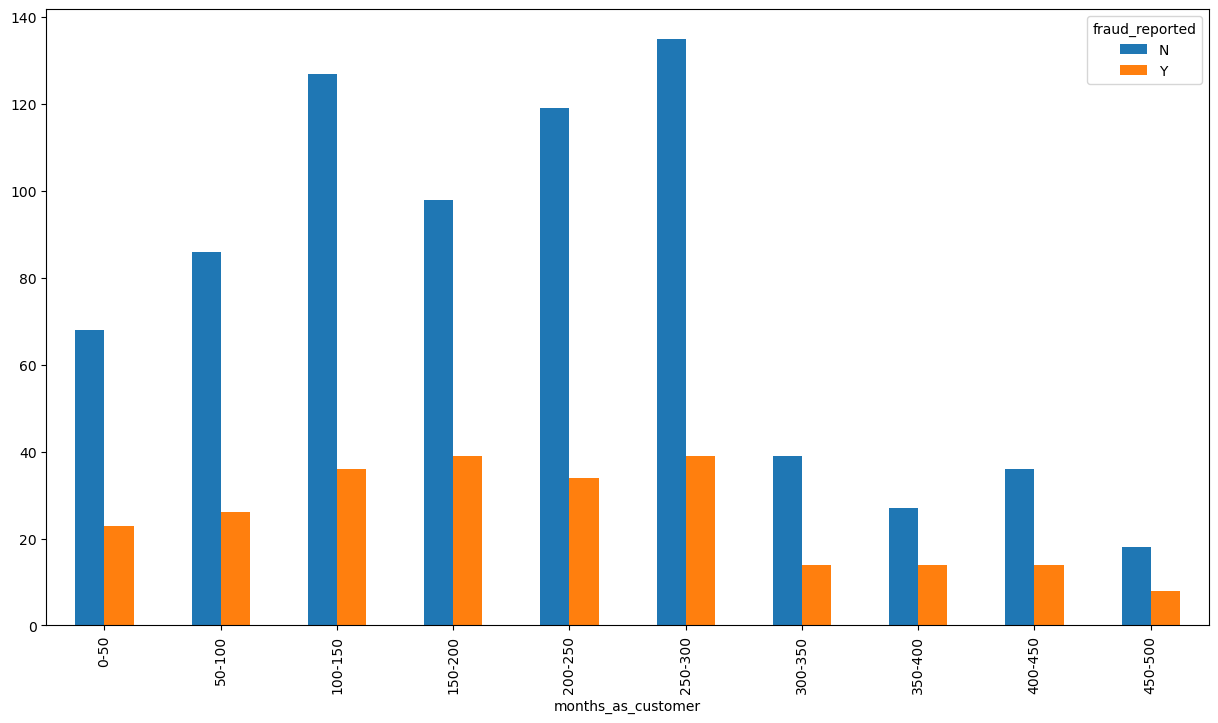

In [37]:
cust_vs_fraud.plot(kind = 'bar', figsize = (15,8))

Most of the frauds are reported from the customers who are 150-300 months old customers

In [38]:
print(df.total_claim_amount.min())
print(df.total_claim_amount.max())

100
114920


In [39]:
claim_bins = pd.cut(df.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])
total_claim_vs_fraud = pd.crosstab(claim_bins, df.fraud_reported)
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_amount,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


<Axes: xlabel='total_claim_amount'>

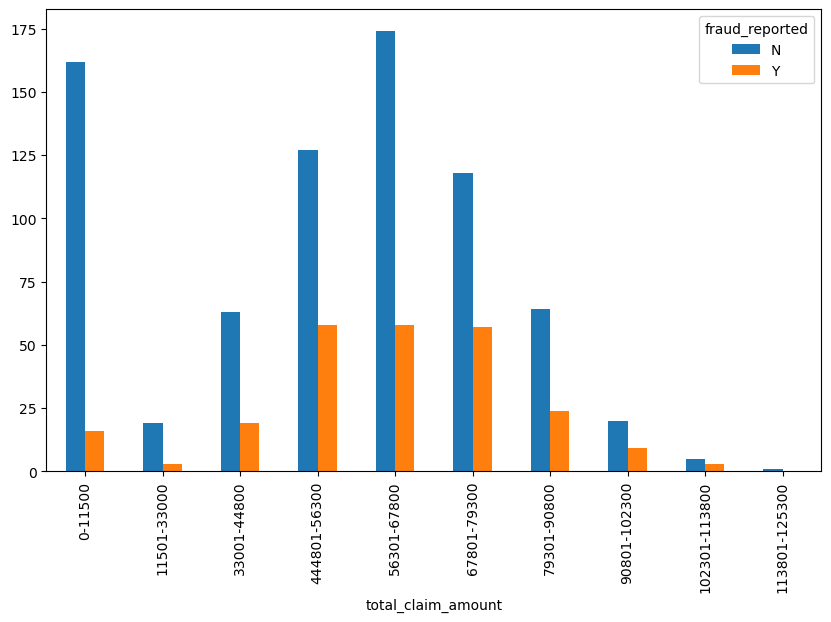

In [40]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

High number of claims are between price range 56301 to 56300

<Axes: xlabel='insured_sex', ylabel='count'>

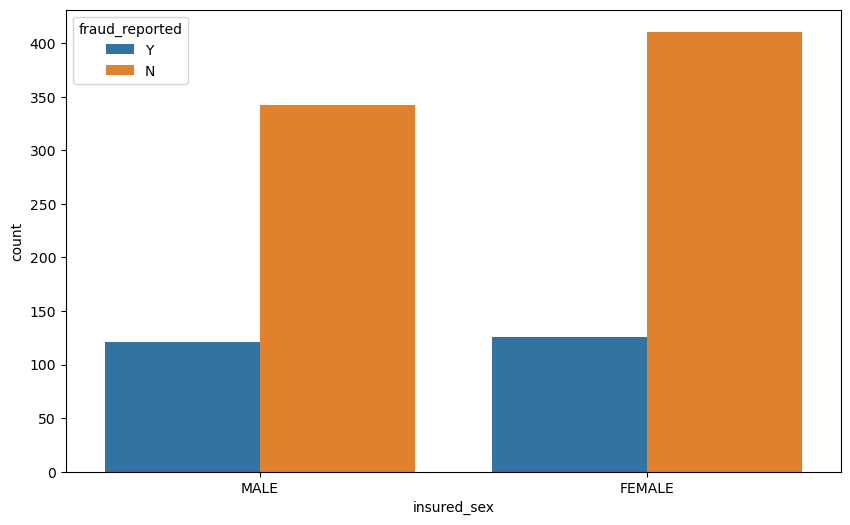

In [41]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'insured_sex', hue = 'fraud_reported', data = df)

More likely to report the fraud are males

<Axes: xlabel='insured_occupation', ylabel='count'>

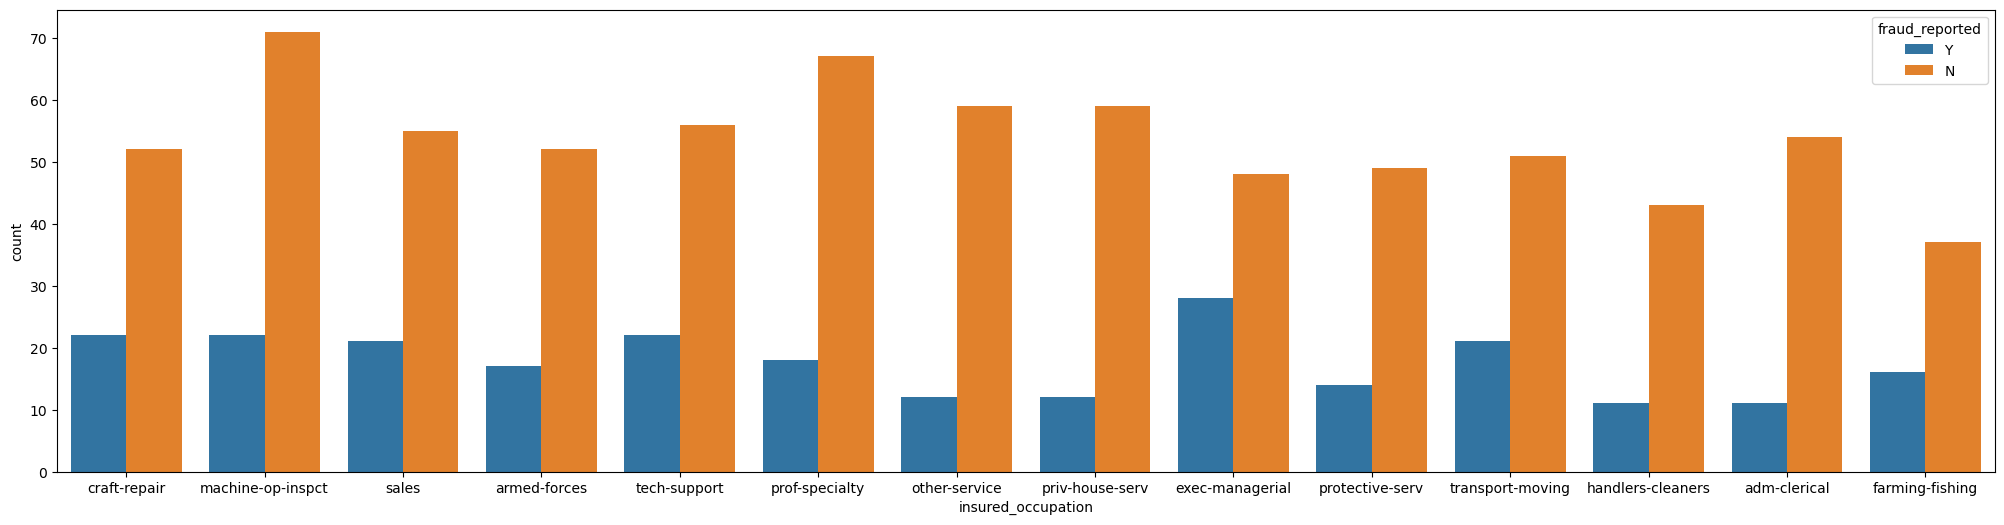

In [42]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df)

Percentage of fraud reporting is higher in exec-managerial and transport-moving occupation

<Axes: xlabel='incident_type', ylabel='count'>

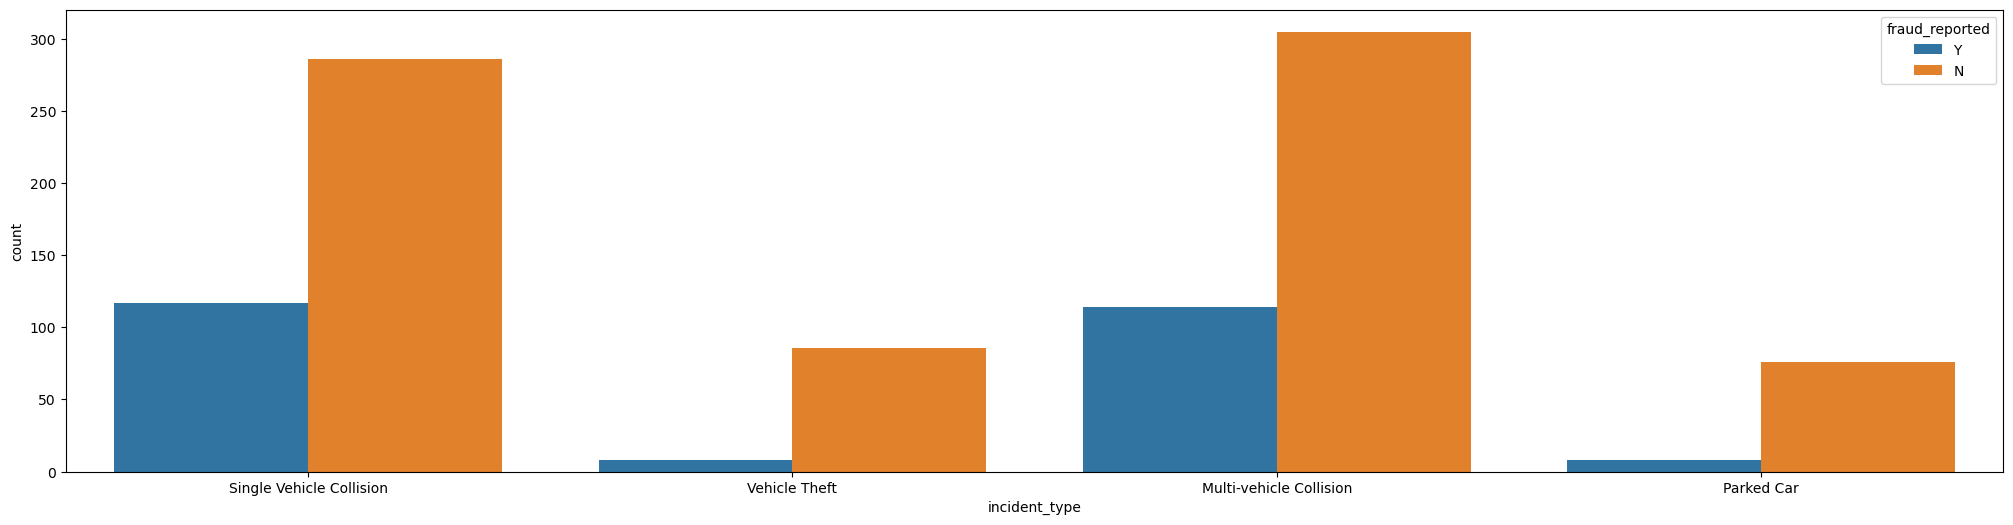

In [43]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'incident_type', hue = 'fraud_reported', data = df)

More frauds are reported for single vehicle collosion and there is less chance of fraud reporting of a parked car.

<Axes: xlabel='collision_type', ylabel='count'>

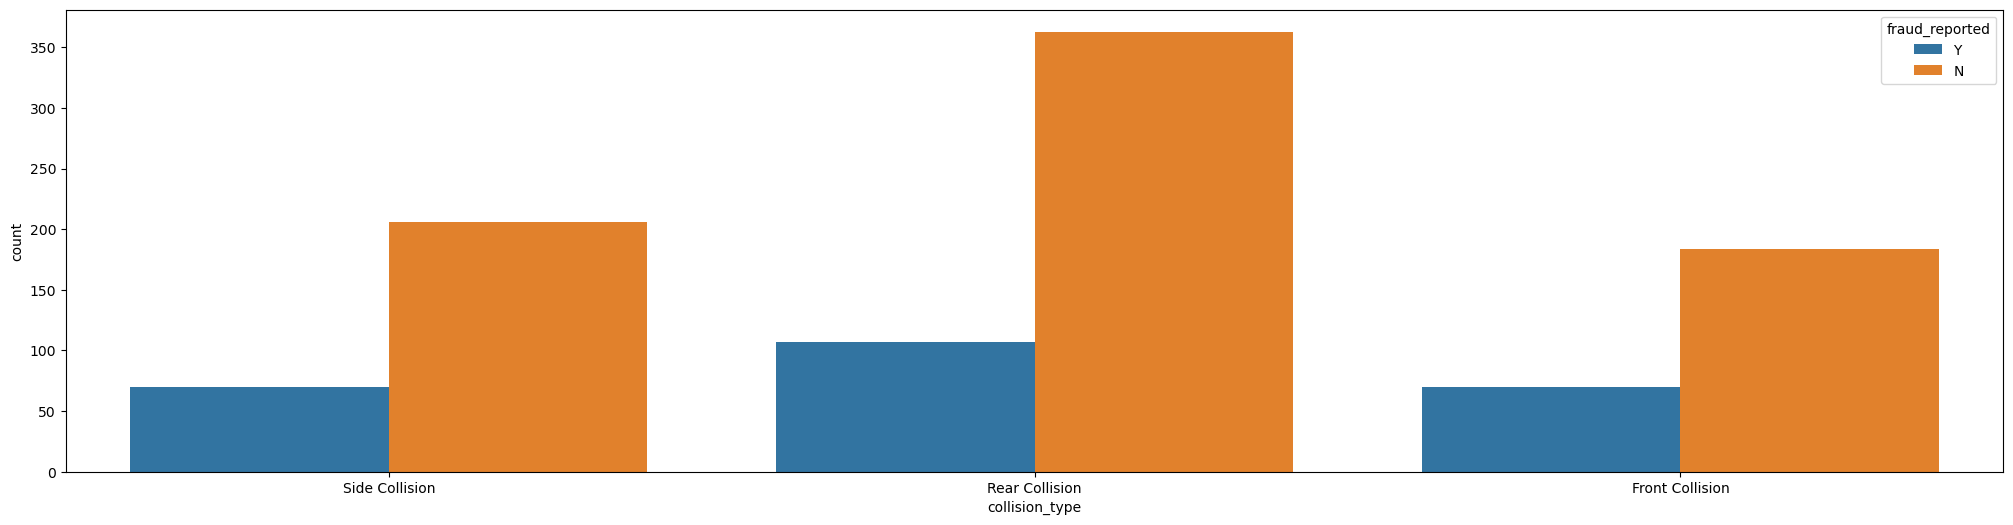

In [44]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'collision_type', hue = 'fraud_reported', data = df)

More frauds with rear collosion frauds reported being aware we have filled Nans in this columns, rear collision is more impactful in fraud report

<Axes: xlabel='incident_state', ylabel='count'>

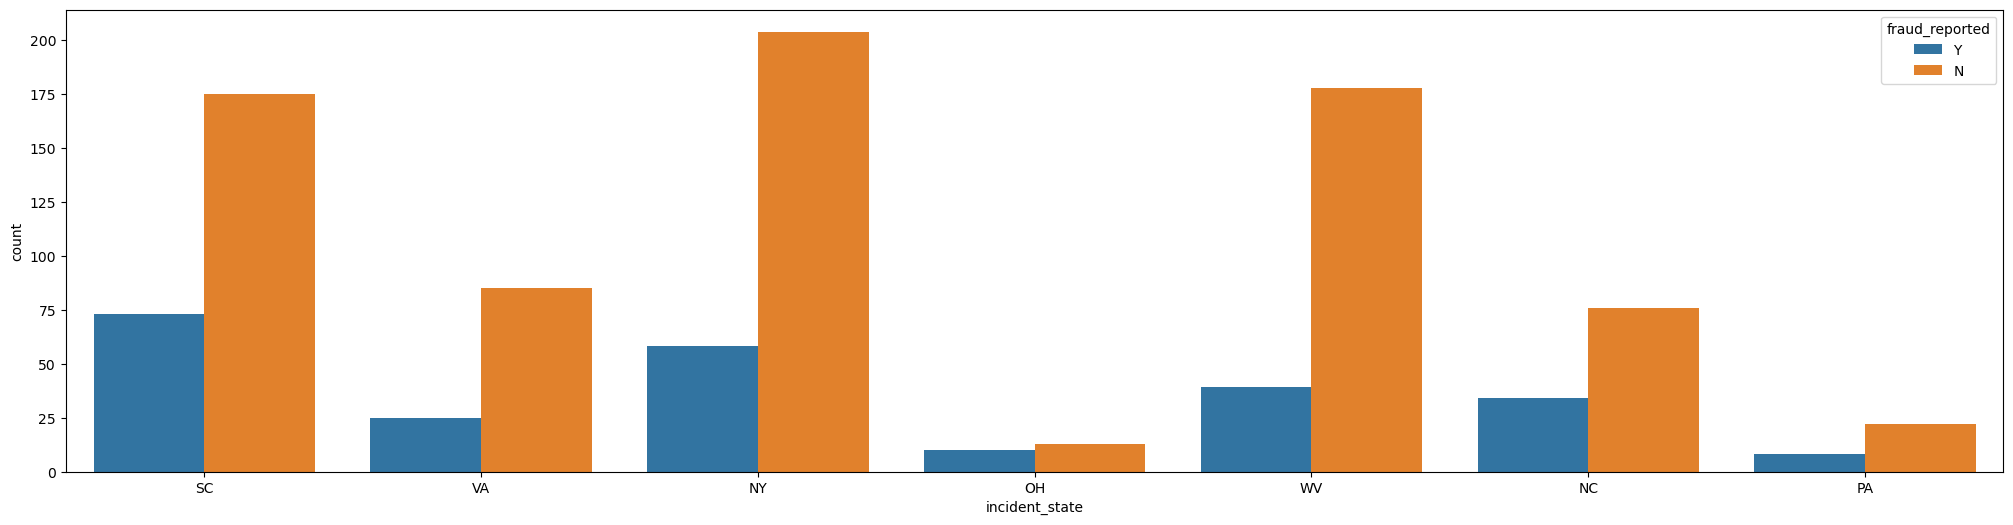

In [45]:
plt.figure(figsize = (25,6))
sns.countplot(x = 'incident_state', hue = 'fraud_reported', data = df)

Percentage of fraud reported is higher in states SC and OH

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

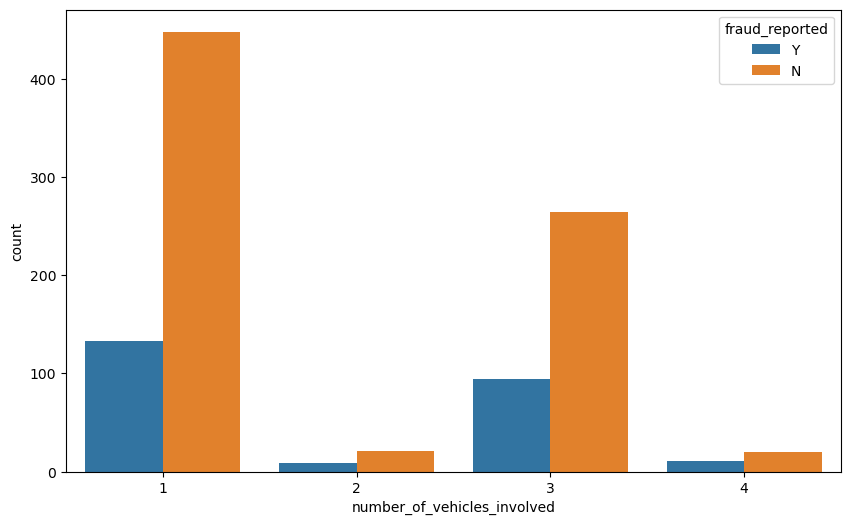

In [46]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df)

Above graph that number of fraud reported is more, when 2 or more vehicles are invloved

<Axes: xlabel='property_damage', ylabel='count'>

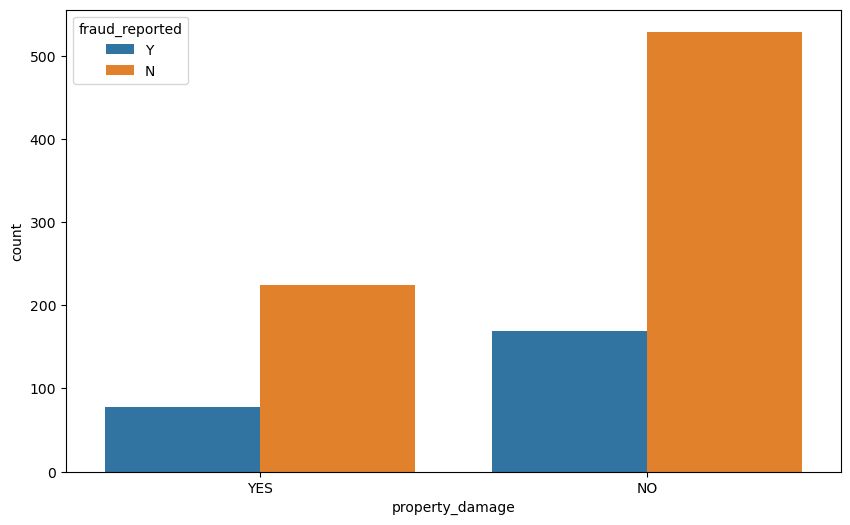

In [48]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'property_damage', hue = 'fraud_reported', data = df)

In case of property damage there are more chances of fraud to be reported

In [50]:
print(df['injury_claim'].max())
print(df['vehicle_claim'].max())
print(df['property_claim'].max())

21450
79560
23670


In [51]:
veh_bins = pd.cut(df.vehicle_claim, bins = [0,10000,20000,30000,40000,50000,60000,70000,80000 ], include_lowest = True, labels = ['0-10000','10000-20000','20000-30000','30000-40000', '40000-50000', '50000-60000', '60000-70000','70000-80000'])
inj_bins = pd.cut(df.injury_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000'])
prop_bins = pd.cut(df.property_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000']) 

In [52]:
veh_binsvs_fraud = pd.crosstab(veh_bins, df.fraud_reported)
inj_binsvs_fraud = pd.crosstab(inj_bins, df.fraud_reported)
prop_binsvs_fraud = pd.crosstab(prop_bins, df.fraud_reported)

<Axes: xlabel='vehicle_claim'>

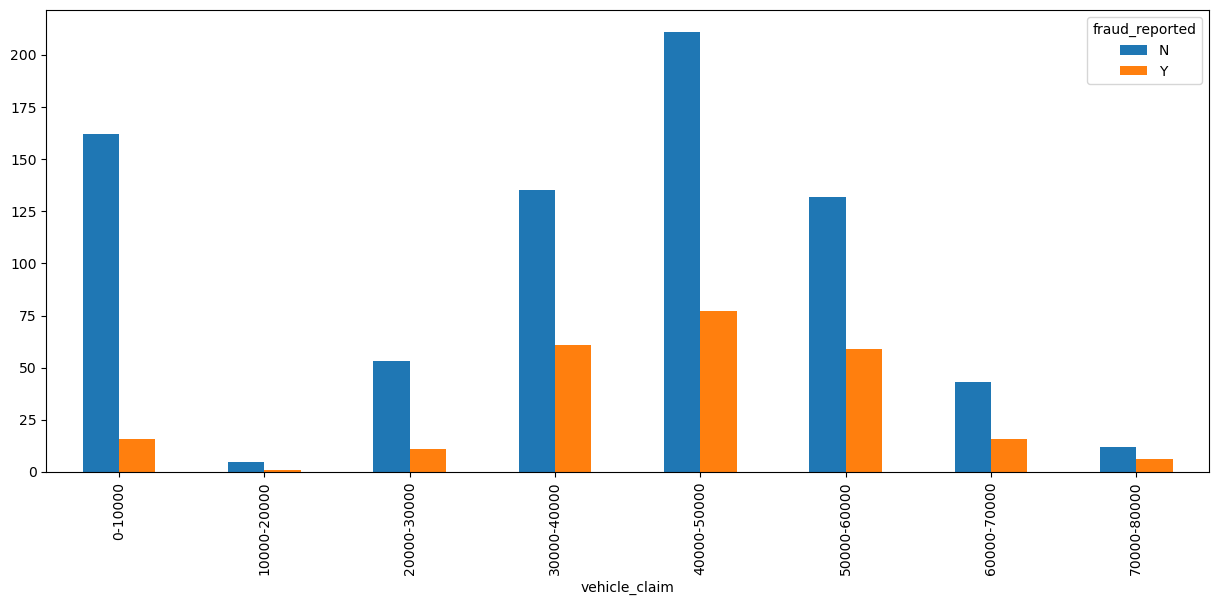

In [53]:
veh_binsvs_fraud.plot(kind = 'bar', figsize = (15,6))

More frauds are reported when vehicle was billed between 30000 to 60000

<Axes: xlabel='injury_claim'>

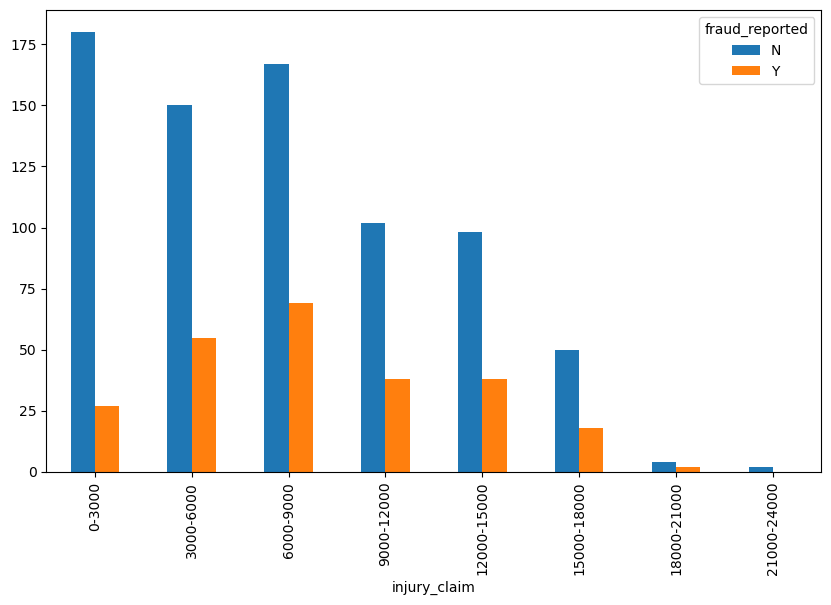

In [54]:
inj_binsvs_fraud.plot(kind = 'bar', figsize = (10,6))

More frauds are reported when Injury claim is between 3000 to 15000

<Axes: xlabel='property_claim'>

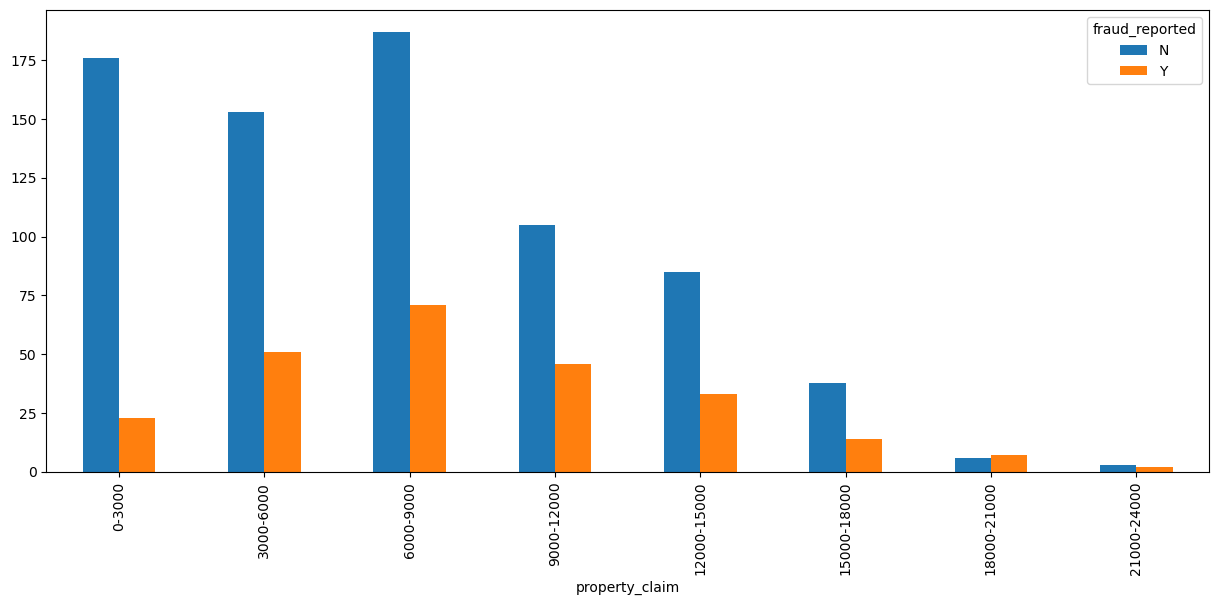

In [55]:
prop_binsvs_fraud.plot(kind = 'bar', figsize = (15,6))

Most frauds are reported when property claim is 3000 to 15000

In [57]:
#dropping few columns
df.drop(columns = ['policy_csl','insured_zip','insured_education_level','insured_occupation','insured_hobbies', 'incident_state', 'incident_city', 'property_damage','age_bins', ], axis = 1, inplace = True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [69]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['policy_state'] = Le.fit_transform(df['policy_state'])
df['insured_sex'] = Le.fit_transform(df['insured_sex'])
df['insured_relationship'] = Le.fit_transform(df['insured_relationship'])
df['incident_type'] = Le.fit_transform(df['incident_type'])
df['collision_type'] = Le.fit_transform(df['collision_type'])
df['incident_severity'] = Le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = Le.fit_transform(df['authorities_contacted'])
df['incident_location'] = Le.fit_transform(df['incident_location'])
df['police_report_available'] = Le.fit_transform(df['police_report_available'])
df['auto_make'] = Le.fit_transform(df['auto_make'])
df['auto_model'] = Le.fit_transform(df['auto_model'])
df['fraud_reported'] = Le.fit_transform(df['fraud_reported'])

In [73]:
df['auto_model'] = Le.fit_transform(df['auto_model'])

In [70]:
#checking correlation
df.corr()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_relationship,capital-gains,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,-0.000328,0.026807,0.005018,0.015498,0.060925,0.069727,0.006399,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,-0.014533,0.029188,0.014404,0.018126,0.073337,0.074832,-0.007075,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.072815,-0.006738,0.022566,0.008968,0.004564,0.017120,0.009802,...,-0.012661,0.031190,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_state,-0.000328,-0.014533,0.072815,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.018506,0.074551,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_deductable,0.026807,0.029188,-0.006738,0.010033,1.000000,-0.003245,0.010870,-0.009733,-0.022945,0.035212,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,0.012455,-0.003245,1.000000,-0.006247,0.038853,0.001925,-0.013738,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.029580,0.010870,-0.006247,1.000000,0.010688,0.077495,-0.047268,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,0.004564,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.002855,-0.020494,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_relationship,0.069727,0.074832,0.017120,-0.018506,-0.022945,0.001925,0.077495,0.002855,1.000000,-0.019439,...,0.002362,-0.017471,0.002229,0.029014,0.007332,-0.006256,-0.027028,0.063671,-0.023345,0.021043
capital-gains,0.006399,-0.007075,0.009802,0.074551,0.035212,-0.013738,-0.047268,-0.020494,-0.019439,1.000000,...,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,0.052014,0.036569,0.031398,-0.019173


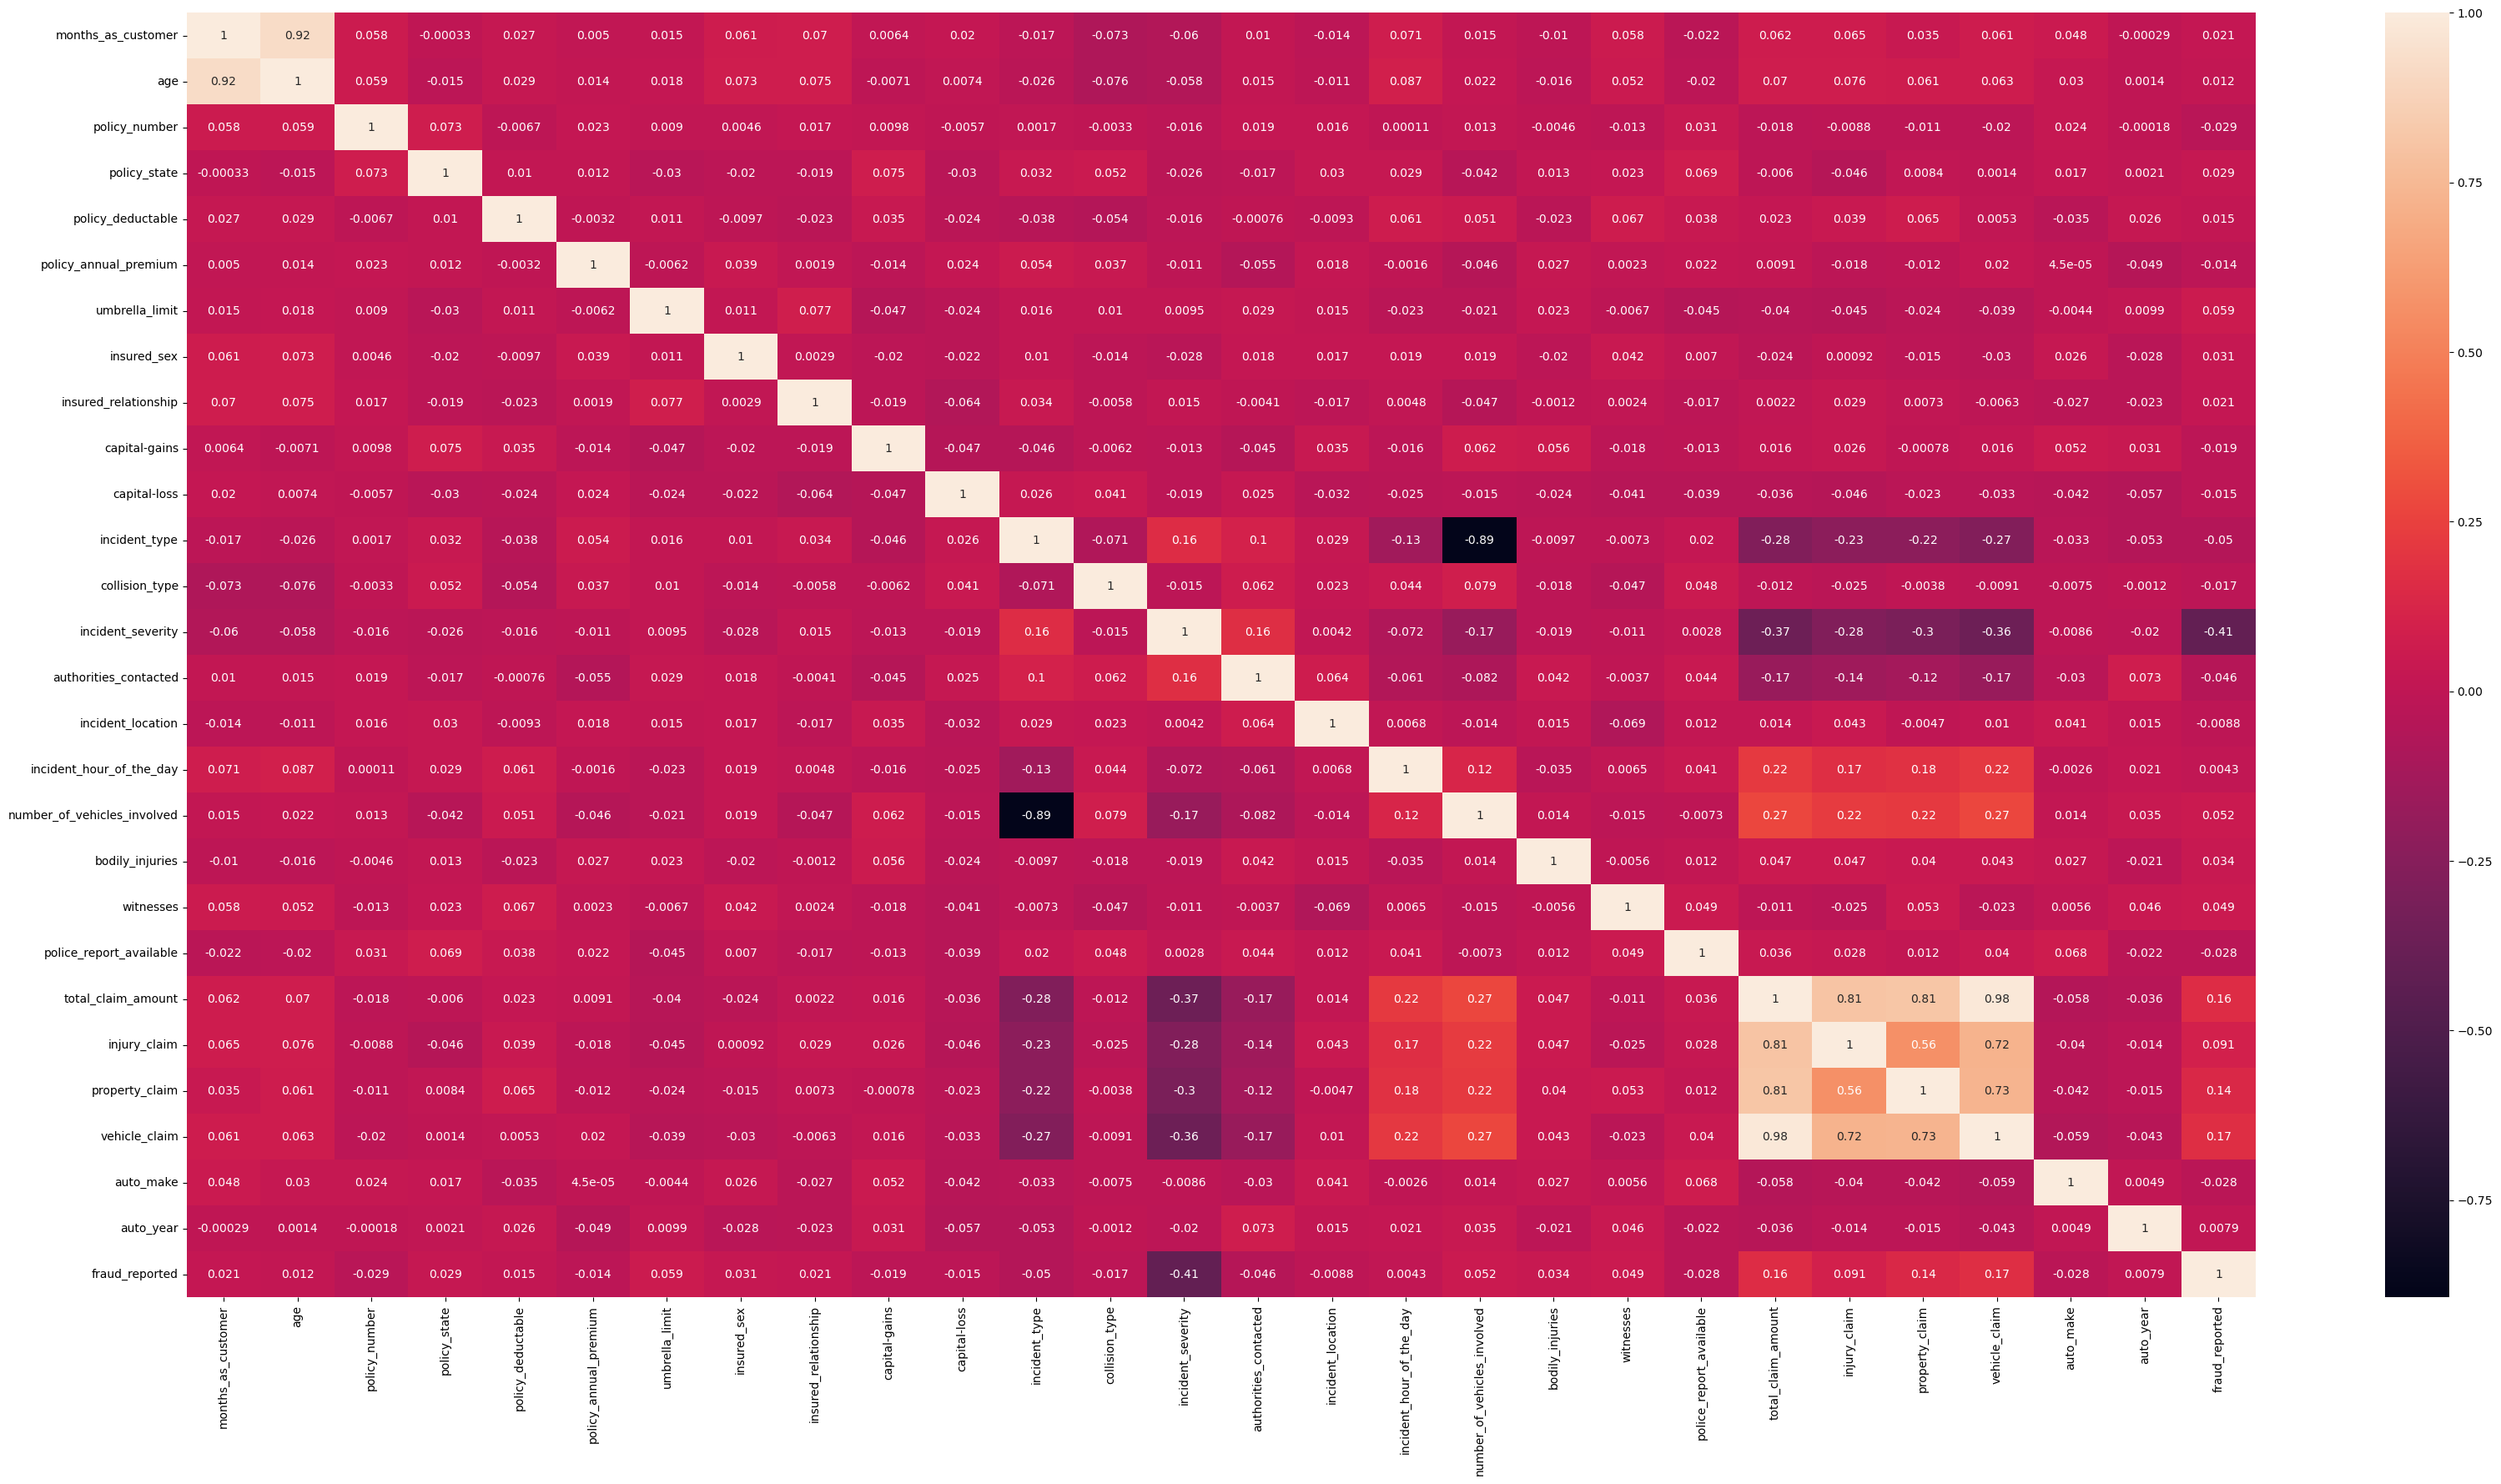

In [62]:
#heatmap
plt.figure(figsize = (40,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

1.Heatmap analysis shows that target column has strong negative correlation with the incident_survey column.
2.Total claim has 98% correlation with the vehicle claim. 
3.92 % correlation exists between months as customer and age.

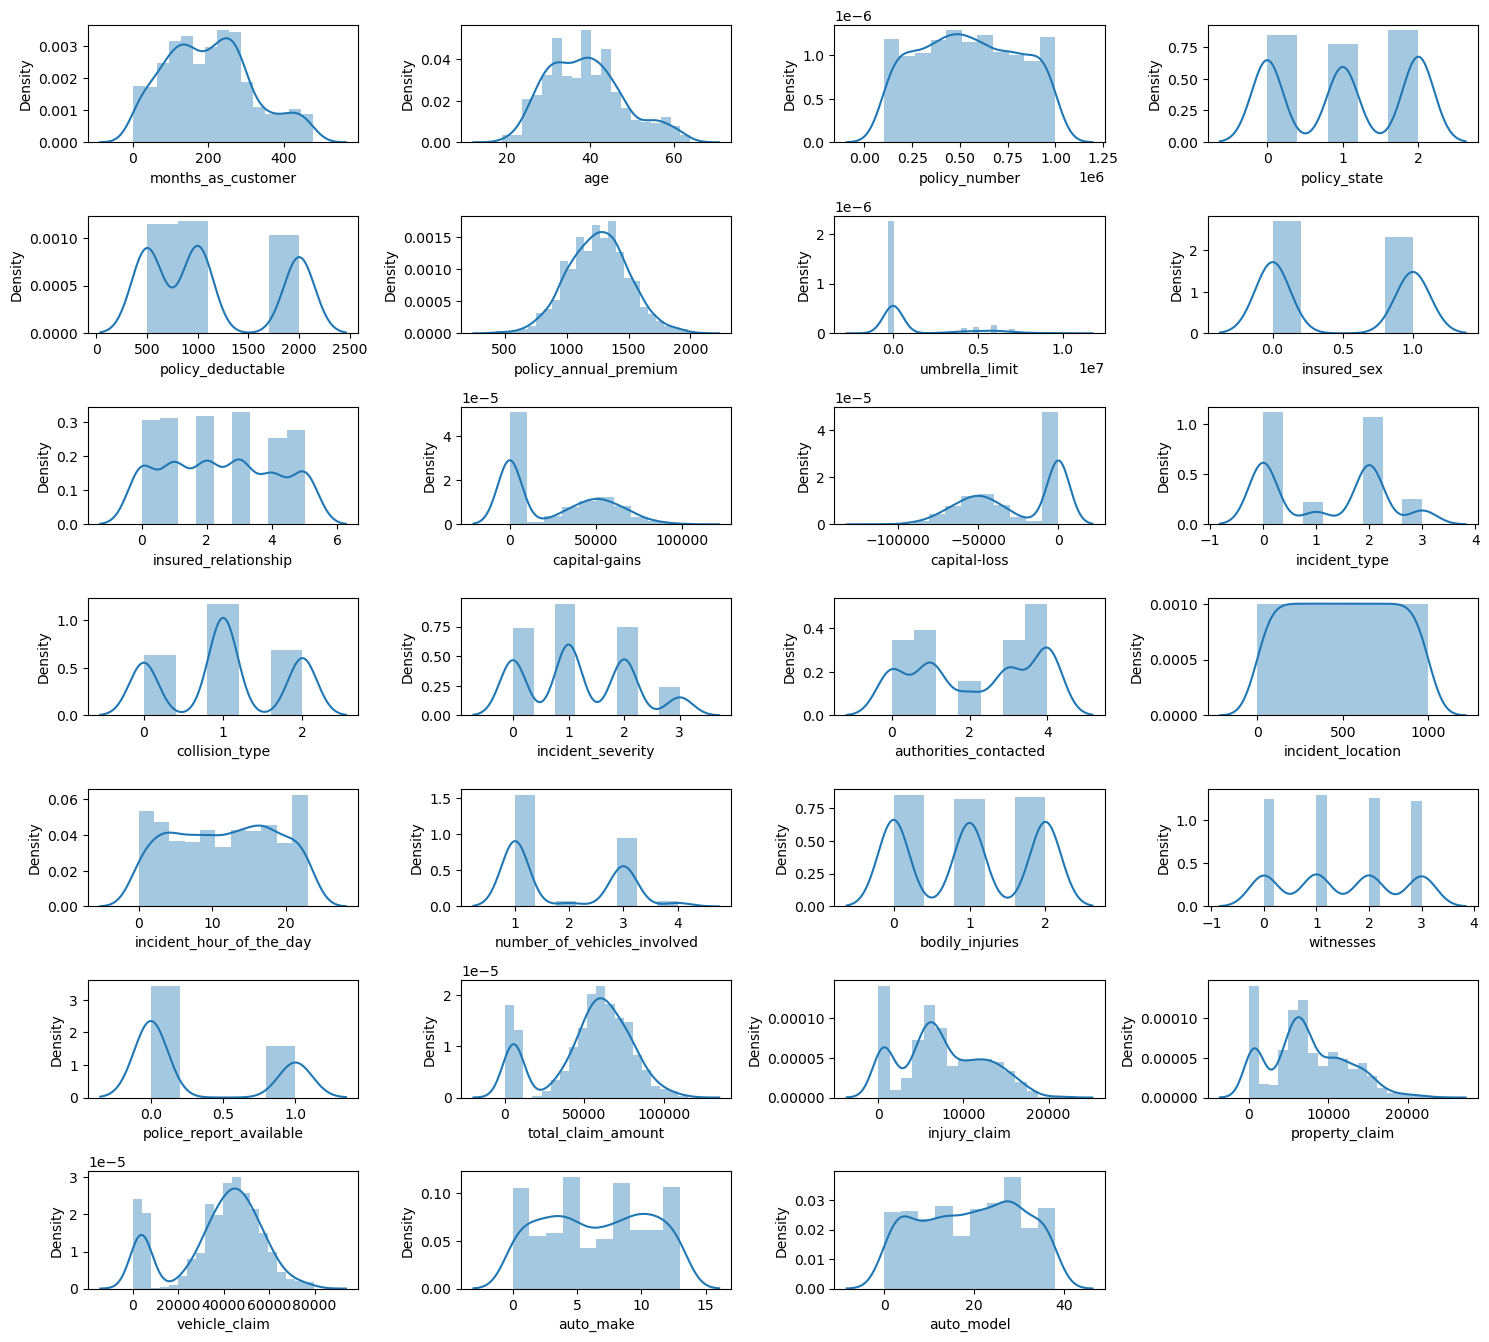

In [76]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnum = 1

for column in df:
    if plotnum <=27:
        ax = plt.subplot(8,4, plotnum)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnum+=1
    
plt.tight_layout()

# Finding Best Random State

In [77]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [78]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [79]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8 at random state  16


# Balancing the dataset

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
X,Y=SMOTE(k_neighbors=3).fit_resample(x,y)

In [82]:
X.shape

(1506, 28)

In [83]:
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

As we can see the data is balanced.

# Training & Testing of Data

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=16)

# Applying various models

In [85]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predlg),'%')

for i in range(2,10):
    cvs = cross_val_score(lg,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predlg))
print('\n Classification Report: \n',classification_report(y_test,predlg))

Accuracy score is:  0.8 %
Cross Validation Score for cv= 2 is 0.75
Cross Validation Score for cv= 3 is 0.7489945034855214
Cross Validation Score for cv= 4 is 0.7489999999999999
Cross Validation Score for cv= 5 is 0.75
Cross Validation Score for cv= 6 is 0.750998003992016
Cross Validation Score for cv= 7 is 0.7530005206061544
Cross Validation Score for cv= 8 is 0.751
Cross Validation Score for cv= 9 is 0.751018876018876

 Confusion Matrix: 
 [[239   3]
 [ 57   1]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       242
           1       0.25      0.02      0.03        58

    accuracy                           0.80       300
   macro avg       0.53      0.50      0.46       300
weighted avg       0.70      0.80      0.72       300



In [86]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predsvc),'%')

for i in range(2,10):
    cvs = cross_val_score(svc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predsvc))
print('\n Classification Report: \n',classification_report(y_test,predsvc))

Accuracy score is:  0.8066666666666666 %
Cross Validation Score for cv= 2 is 0.753
Cross Validation Score for cv= 3 is 0.7530015044985104
Cross Validation Score for cv= 4 is 0.7530000000000001
Cross Validation Score for cv= 5 is 0.7529999999999999
Cross Validation Score for cv= 6 is 0.7530000240482889
Cross Validation Score for cv= 7 is 0.7530005206061542
Cross Validation Score for cv= 8 is 0.753
Cross Validation Score for cv= 9 is 0.753003003003003

 Confusion Matrix: 
 [[242   0]
 [ 58   0]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       242
           1       0.00      0.00      0.00        58

    accuracy                           0.81       300
   macro avg       0.40      0.50      0.45       300
weighted avg       0.65      0.81      0.72       300



In [88]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,preddtc),'%')

for i in range(2,10):
    cvs = cross_val_score(dtc,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,preddtc))
print('\n Classification Report: \n',classification_report(y_test,preddtc))

Accuracy score is:  0.7033333333333334 %
Cross Validation Score for cv= 2 is 0.692
Cross Validation Score for cv= 3 is 0.7029694365023706
Cross Validation Score for cv= 4 is 0.7030000000000001
Cross Validation Score for cv= 5 is 0.711
Cross Validation Score for cv= 6 is 0.6999795589543805
Cross Validation Score for cv= 7 is 0.6879951034880613
Cross Validation Score for cv= 8 is 0.706
Cross Validation Score for cv= 9 is 0.7159749034749034

 Confusion Matrix: 
 [[184  58]
 [ 31  27]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       242
           1       0.32      0.47      0.38        58

    accuracy                           0.70       300
   macro avg       0.59      0.61      0.59       300
weighted avg       0.75      0.70      0.72       300



In [89]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predRF),'%')

for i in range(2,10):
    cvs = cross_val_score(RF,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predRF))
print('\n Classification Report: \n',classification_report(y_test,predRF))

Accuracy score is:  0.7933333333333333 %
Cross Validation Score for cv= 2 is 0.77
Cross Validation Score for cv= 3 is 0.7739955524386662
Cross Validation Score for cv= 4 is 0.7730000000000001
Cross Validation Score for cv= 5 is 0.769
Cross Validation Score for cv= 6 is 0.7670442248034052
Cross Validation Score for cv= 7 is 0.7720307861152931
Cross Validation Score for cv= 8 is 0.787
Cross Validation Score for cv= 9 is 0.7630398255398254

 Confusion Matrix: 
 [[215  27]
 [ 35  23]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       242
           1       0.46      0.40      0.43        58

    accuracy                           0.79       300
   macro avg       0.66      0.64      0.65       300
weighted avg       0.78      0.79      0.79       300



In [90]:
# Using AdaBoost classifier:

from sklearn.ensemble import AdaBoostClassifier
Ad=AdaBoostClassifier()
Ad.fit(x_train,y_train)
predAd=Ad.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predAd),'%')

for i in range(2,10):
    cvs = cross_val_score(Ad,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predAd))
print('\n Classification Report: \n',classification_report(y_test,predAd))

Accuracy score is:  0.7933333333333333 %
Cross Validation Score for cv= 2 is 0.747
Cross Validation Score for cv= 3 is 0.780987574400748
Cross Validation Score for cv= 4 is 0.772
Cross Validation Score for cv= 5 is 0.77
Cross Validation Score for cv= 6 is 0.7770603371570113
Cross Validation Score for cv= 7 is 0.7810288303246049
Cross Validation Score for cv= 8 is 0.79
Cross Validation Score for cv= 9 is 0.7800210925210924

 Confusion Matrix: 
 [[214  28]
 [ 34  24]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       242
           1       0.46      0.41      0.44        58

    accuracy                           0.79       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.79      0.79      0.79       300



In [91]:
# Using GuasianNB classifier:

from sklearn.naive_bayes import GaussianNB
Gu=GaussianNB()
Gu.fit(x_train,y_train)
predGu=Gu.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predGu),'%')

for i in range(2,10):
    cvs = cross_val_score(Gu,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predGu))
print('\n Classification Report: \n',classification_report(y_test,predGu))

Accuracy score is:  0.8 %
Cross Validation Score for cv= 2 is 0.746
Cross Validation Score for cv= 3 is 0.7299754844665024
Cross Validation Score for cv= 4 is 0.752
Cross Validation Score for cv= 5 is 0.752
Cross Validation Score for cv= 6 is 0.7470059880239521
Cross Validation Score for cv= 7 is 0.7509954833898496
Cross Validation Score for cv= 8 is 0.75
Cross Validation Score for cv= 9 is 0.7450039325039325

 Confusion Matrix: 
 [[240   2]
 [ 58   0]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       242
           1       0.00      0.00      0.00        58

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.44       300
weighted avg       0.65      0.80      0.72       300



In [92]:
# Using XG Booster:

from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(x_train,y_train)
predXG=XG.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predXG),'%')

for i in range(2,10):
    cvs = cross_val_score(XG,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predXG))
print('\n Classification Report: \n',classification_report(y_test,predXG))

Accuracy score is:  0.8066666666666666 %
Cross Validation Score for cv= 2 is 0.766
Cross Validation Score for cv= 3 is 0.7739985494476512
Cross Validation Score for cv= 4 is 0.7669999999999999
Cross Validation Score for cv= 5 is 0.761
Cross Validation Score for cv= 6 is 0.7600702210037756
Cross Validation Score for cv= 7 is 0.777996651236088
Cross Validation Score for cv= 8 is 0.773
Cross Validation Score for cv= 9 is 0.7810042185042186

 Confusion Matrix: 
 [[217  25]
 [ 33  25]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       242
           1       0.50      0.43      0.46        58

    accuracy                           0.81       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.80      0.81      0.80       300



In [95]:
# Using GB Booster:

from sklearn.ensemble import GradientBoostingClassifier
xb=GradientBoostingClassifier()
xb.fit(x_train,y_train)
predxb=xb.predict(x_test)
print('Accuracy score is: ',accuracy_score(y_test,predxb),'%')

for i in range(2,10):
    cvs = cross_val_score(xb,x, y,cv =i,scoring='accuracy') 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predxb))
print('\n Classification Report: \n',classification_report(y_test,predxb))

Accuracy score is:  0.8 %
Cross Validation Score for cv= 2 is 0.767
Cross Validation Score for cv= 3 is 0.7800135464806123
Cross Validation Score for cv= 4 is 0.778
Cross Validation Score for cv= 5 is 0.7719999999999999
Cross Validation Score for cv= 6 is 0.7820744054060554
Cross Validation Score for cv= 7 is 0.7760619662028113
Cross Validation Score for cv= 8 is 0.779
Cross Validation Score for cv= 9 is 0.7780012155012155

 Confusion Matrix: 
 [[214  28]
 [ 32  26]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       242
           1       0.48      0.45      0.46        58

    accuracy                           0.80       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.79      0.80      0.80       300



# After several model performances, GradientBoost Classifier has the best accuracy score of 80 % with CV score of 78.20%

# Hyperparameter tuning the model

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train, y_train)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 15, 'n_estimators': 100}


In [98]:
rf=RandomForestClassifier(criterion='gini',max_depth=25, max_features='log2', min_samples_split=2, n_estimators=100 )
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  80.66666666666666
Cross val Score : 76.7000605028774


# AUC ROC Curve:

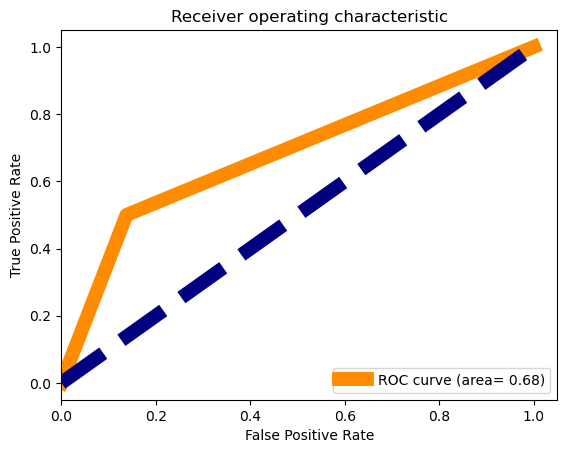

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(rf_pred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [100]:
import joblib
joblib.dump(RF,'Project_Automobile_insurance_fraud.pkl')

['Project_Automobile_insurance_fraud.pkl']

# Predicting the saved model

In [101]:
import numpy as np
a=np.array(y_test)
predicted= np.array(RF.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
295,0,0
296,0,0
297,0,0
298,0,0
